In [5]:
import pandas
import pandas as pd
from datetime import datetime
# read in CSV
RAW_DF = pd.read_csv('surveyresponses2021.csv') # this year's responses (2021 data)
OLD_DF = pd.read_csv('2020-wics-advocacy-survey-responses.csv') # last year's responses

In [6]:
# DATA CLEANING

# drop metadata columns
CLEAN_DF = RAW_DF.drop(columns=['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel', 'UserLanguage'])
OLD_DF = OLD_DF.drop(columns=['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel', 'UserLanguage'])
# create question key
QUESTION_KEY = CLEAN_DF.drop(range(1, CLEAN_DF.shape[0])).to_dict()
# drop metadata rows
CLEAN_DF = CLEAN_DF.drop([0, 1])

# standardize expected graduation date with datetime
DATETIME_COL = pd.to_datetime(CLEAN_DF['Q2'], errors='coerce')
DATETIME_COL[DATETIME_COL.isna()] = pd.to_datetime(CLEAN_DF['Q2'][DATETIME_COL.isna()], format='%M/%y')
# add column with expected graduation date as datetime
CLEAN_DF['Q2_DT'] = DATETIME_COL
# drop responses for respondents outside of graduation date range
CLEAN_DF = CLEAN_DF[(datetime(2021, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2026, 8, 31))]

In [7]:
# CONSTANTS

# schools
ARTS_HUMANITIES = ['Art, Film, and Visual Studies', 'Classics', 'Comparative Literature', 'East Asian Studies', 'English', 'Folklore and Mythology', 'Germanic Languages and Literatures', 'History and Literature', 'History of Art and Architecture', 'Linguistics', 'Music', 'Near Eastern Languages and Civilizations', 'Philosophy', 'Religion, Comparative Study of', 'Romance Languages and Literatures', 'Slavic Languages and Literatures', 'South Asian Studies', 'Theater, Dance, & Media']
SOCIAL_SCIENCES = ['African and African American Studies', 'Anthropology', 'Economics', 'Environmental Science and Public Policy', 'Government', 'History', 'History and Science', 'Psychology', 'Social Studies', 'Sociology', 'Women, Gender, and Sexuality, Study of']
PURE_SCIENCES = ['Astrophysics', 'Chemical and Physical Biology', 'Chemistry', 'Chemistry and Physics', 'Earth and Planetary Sciences', 'Human Developmental and Regenerative Biology', 'Human Evolutionary Biology', 'Integrative Biology', 'Mathematics', 'Molecular and Cellular Biology', 'Neuroscience', 'Physics', 'Statistics']
SEAS = ['Applied Mathematics', 'Biomedical Engineering', 'Computer Science', 'Electrical Engineering', 'Engineering Sciences', 'Environmental Science and Engineering', 'Mechanical Engineering']
UNDECIDED = ['Undecided']
NONE = ['None']

# class year
FIRSTYEAR = (datetime(2024, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2025, 8, 31))
SOPHOMORE = (datetime(2023, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2024, 8, 31))
JUNIOR = (datetime(2022, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2023, 8, 31))
SENIOR = (datetime(2021, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2022, 8, 31))

# gender identity
MALE = ['Man']
NONMALE = ['Woman', 'Non-binary']

# sexual orientation
STRAIGHT = ['Straight/Heterosexual']
NONSTRAIGHT = ['Queer', 'Questioning or unsure']

# diagnosed with disability/impairment
DIAGNOSED = ['Yes, I have been diagnosed with a disability or impairment']
NONDIAGNOSED = ['No, I have not been diagnosed with a disability or impairment']

In [8]:
MALE_DF = CLEAN_DF[CLEAN_DF['Q30'].isin(MALE)]
NONMALE_DF = CLEAN_DF[CLEAN_DF['Q30'].isin(NONMALE)]
NONSTRAIGHT_DF = CLEAN_DF[CLEAN_DF['Q32'].isin(NONSTRAIGHT)]
STRAIGHT_DF = CLEAN_DF[CLEAN_DF['Q32'].isin(STRAIGHT)]
WHITE_DF = CLEAN_DF[CLEAN_DF['Q33'].str.contains('White', na=False)]
ASIAN_DF = CLEAN_DF[CLEAN_DF['Q33'].str.contains('Asian', na=False)]
BLACK_DF = CLEAN_DF[CLEAN_DF['Q33'].str.contains('Black or African American', na=False)]
HISPANIC_DF = CLEAN_DF[CLEAN_DF['Q34'] == 'Yes, of Hispanic or Latinx origin']
FGLI_DF = CLEAN_DF[(CLEAN_DF['Q35'] == 'Yes') | (CLEAN_DF['Q36'] == 'Yes')]
NONFGLI_DF = CLEAN_DF[(CLEAN_DF['Q35'] == 'No') & (CLEAN_DF['Q36'] == 'No')]
DIS_DF = CLEAN_DF[CLEAN_DF['Q37'].isin(DIAGNOSED)]
NONDIS_DF = CLEAN_DF[CLEAN_DF['Q37'].isin(NONDIAGNOSED)]

df_lst = {'Male': MALE_DF, 'Nonmale': NONMALE_DF, 'Nonstraight': NONSTRAIGHT_DF, 'Straight': STRAIGHT_DF,
          'White': WHITE_DF, 'Asian': ASIAN_DF, 'Black': BLACK_DF, 'Hispanic': HISPANIC_DF,
          'FGLI': FGLI_DF, 'NONFGLI_DF': NONFGLI_DF, 'DIS_DF': DIS_DF, 'NONDIS_DF': NONDIS_DF}

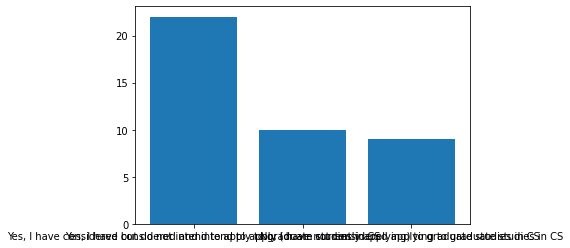

In [9]:
# Q16 - Have you ever considered applying to graduate studies, such as a Master's or Doctorate degree, in CS?
from matplotlib import pyplot as plt

CLEAN_DF['Q16'].dropna()
MALE_DF['Q16'].dropna()
dct = dict(NONMALE_DF['Q16'].dropna().value_counts())

plt.bar(list(dct.keys()), dct.values())
# plt.title(df)
plt.show()

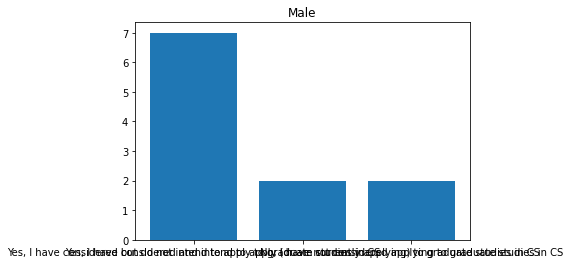

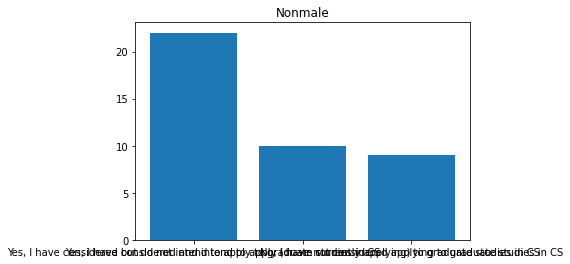

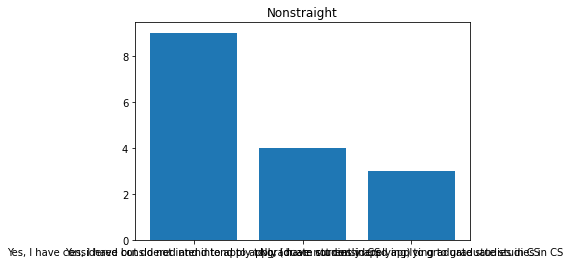

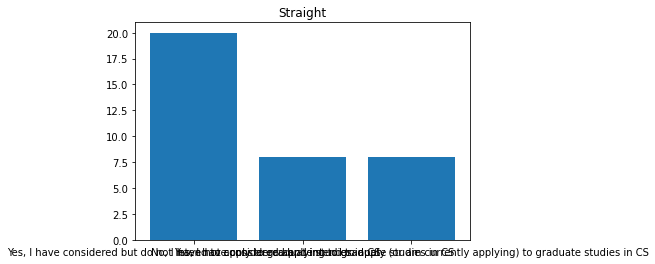

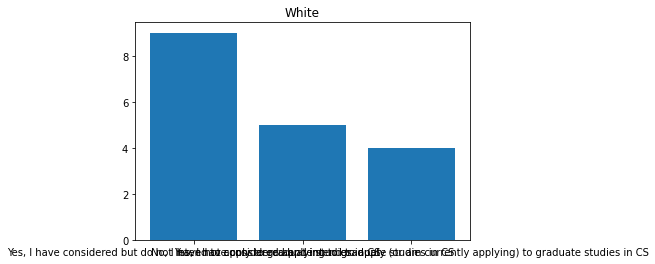

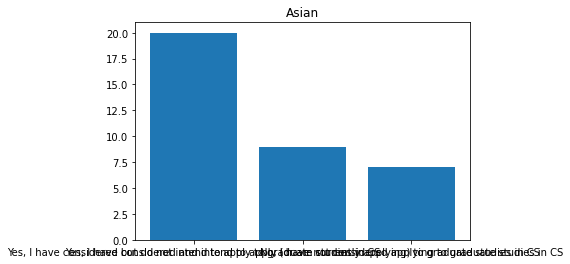

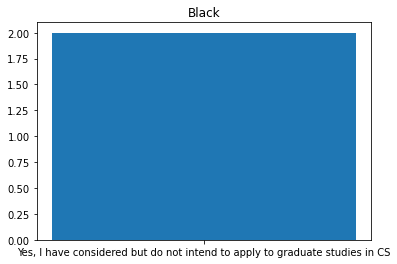

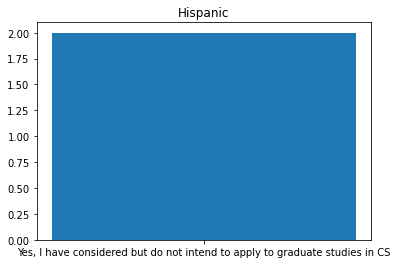

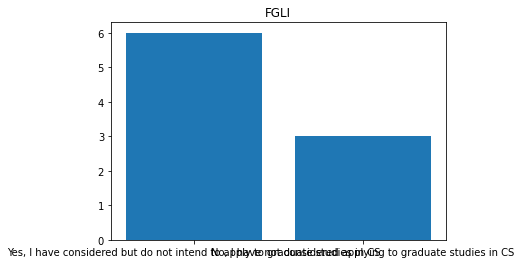

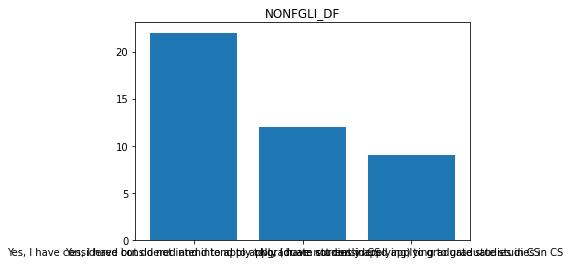

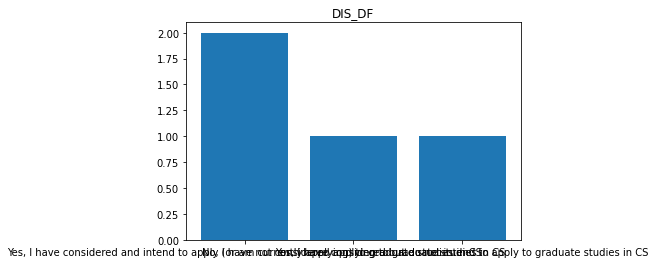

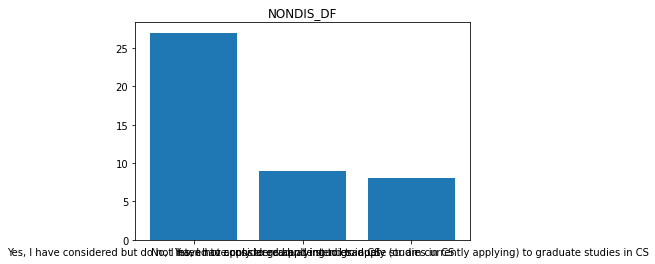

In [14]:
from matplotlib import pyplot as plt

# def get_counts(df):
#     return dict(df['Q16'].dropna().value_counts())
        
for df in df_lst:
#     print(df)
#     print(df_lst[df])
    dct = get_counts(df_lst[df])
    plt.bar(list(dct.keys()), dct.values())
    plt.title(df)
    plt.show()

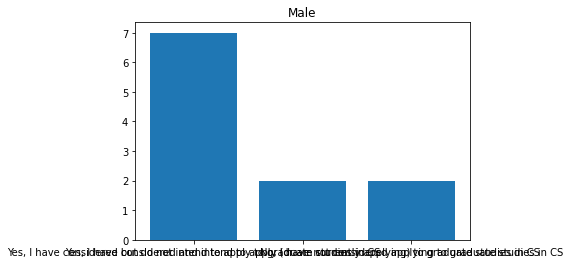

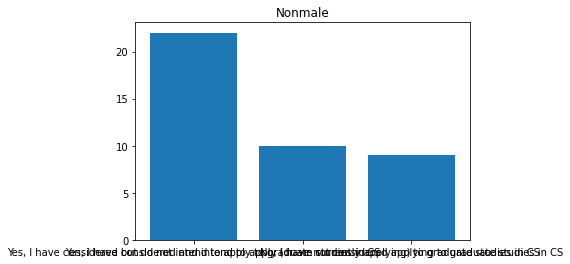

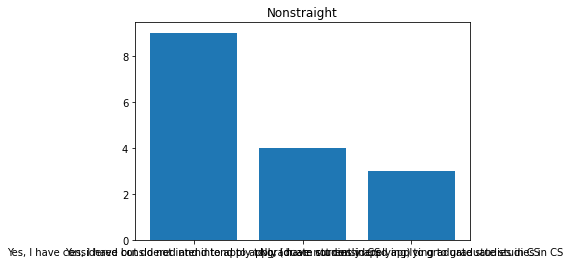

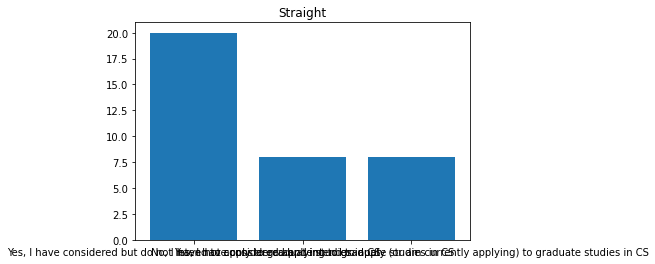

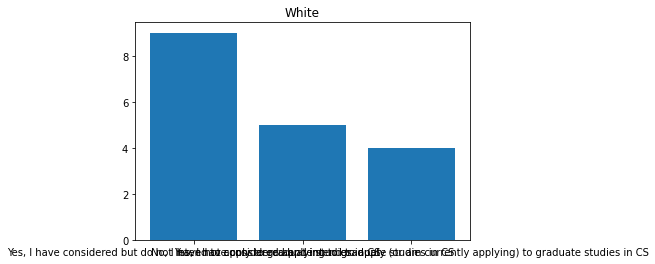

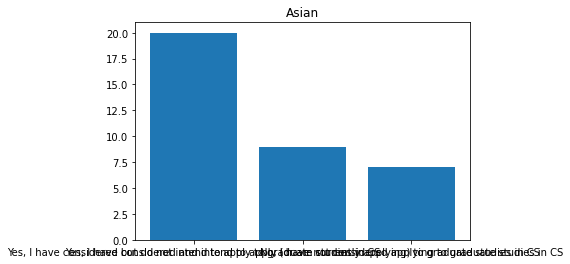

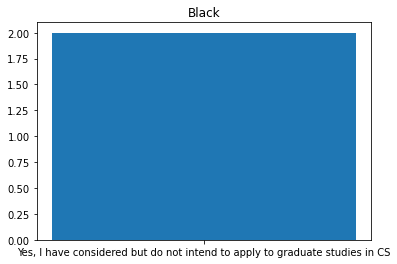

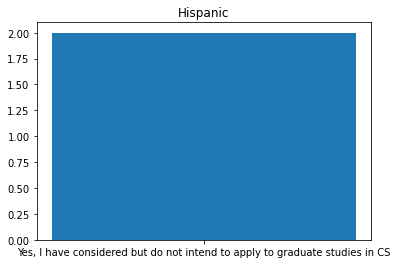

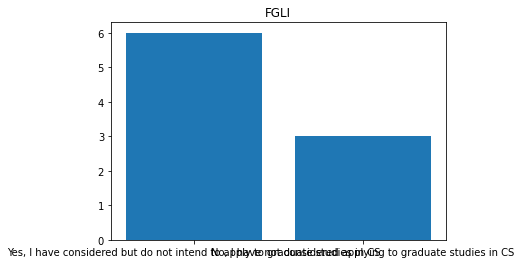

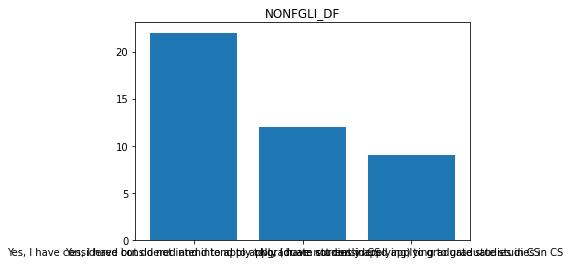

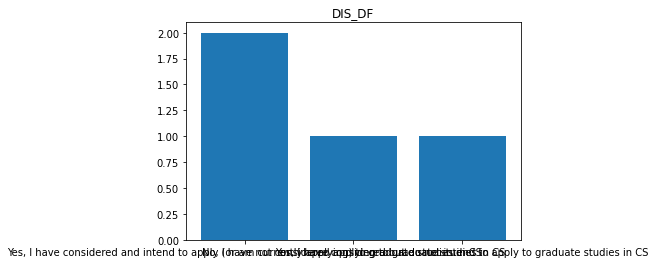

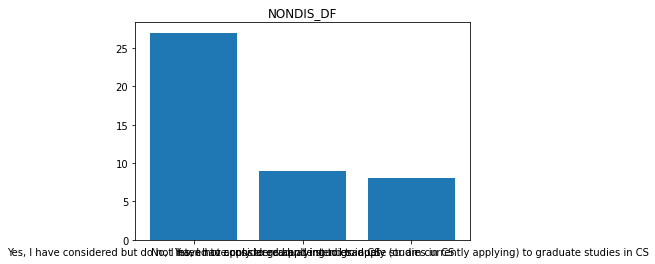

In [15]:
#17- If you answered 'Yes I have considered but do not intend to apply to graduate studies in CS' to the previous question, which of the following reasons has influenced your decision to ultimately not apply? Select all that apply

# CLEAN_DF['Q17']
# CLEAN_DF.columns.dropna().value_counts()

from matplotlib import pyplot as plt

# def get_counts(df):
#     return dict(df['Q17'].dropna().value_counts())
        
for df in df_lst:
#     print(df)
#     print(df_lst[df])
    dct = get_counts(df_lst[df])
    plt.bar(list(dct.keys()), dct.values())
    plt.title(df)
    plt.show()



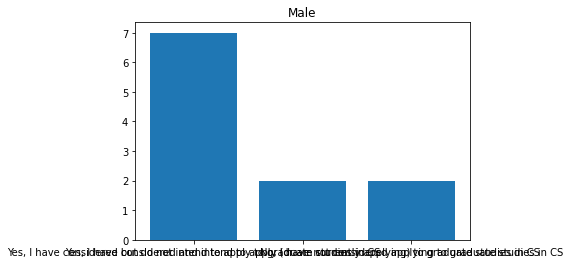

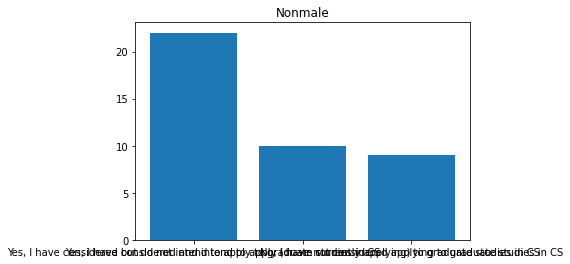

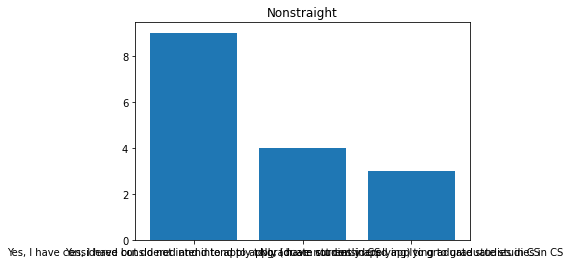

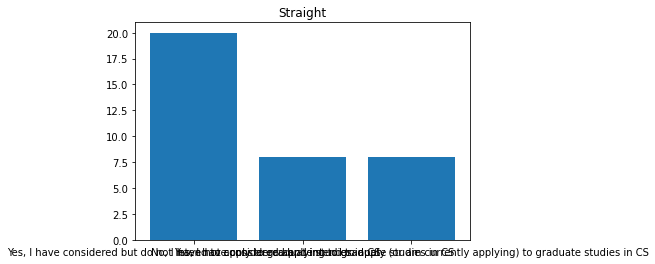

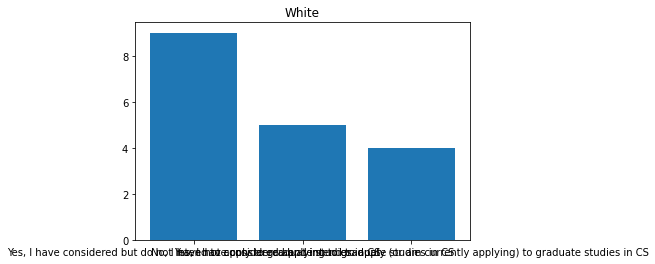

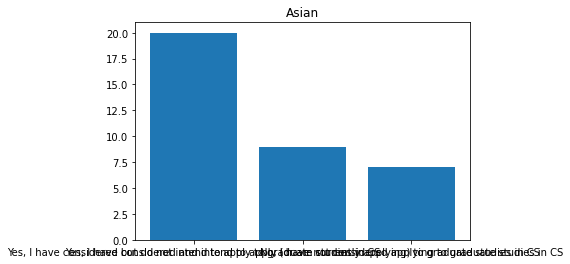

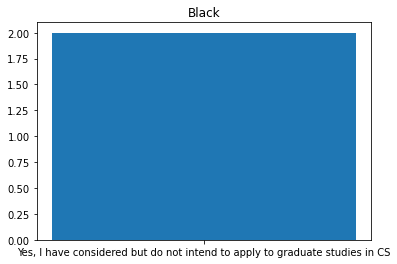

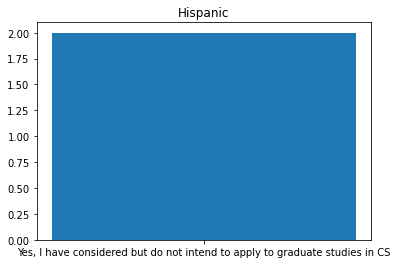

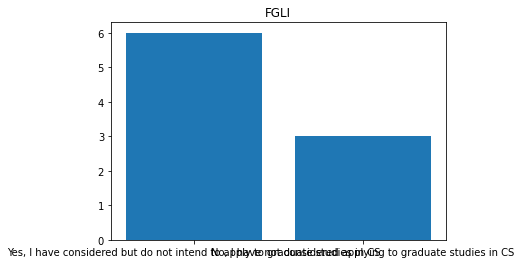

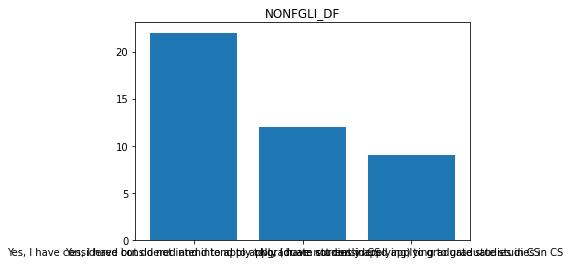

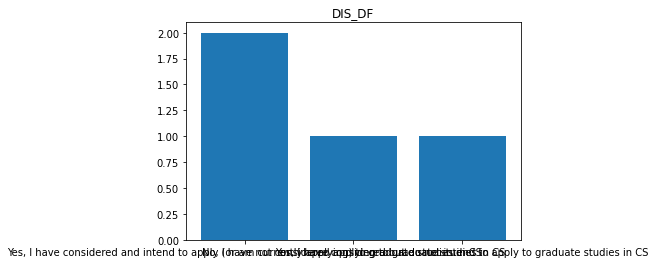

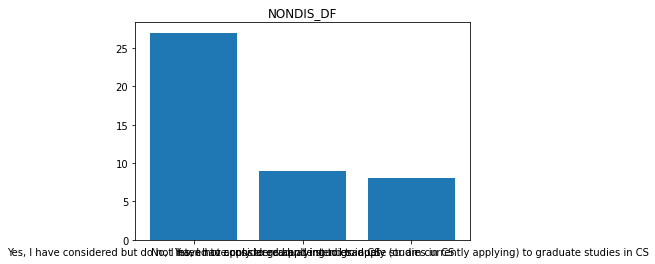

In [16]:
#18- Do you intend to write a senior thesis within the CS department?
from matplotlib import pyplot as plt
for df in df_lst:
    dct = get_counts(df_lst[df])
    plt.bar(list(dct.keys()), dct.values())
    plt.title(df)
    plt.show()


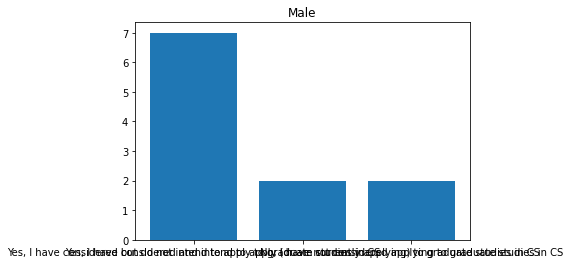

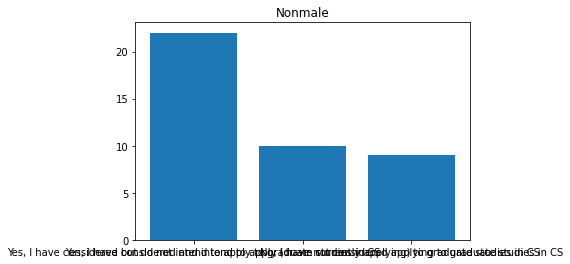

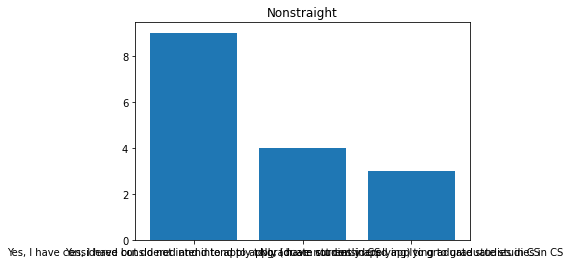

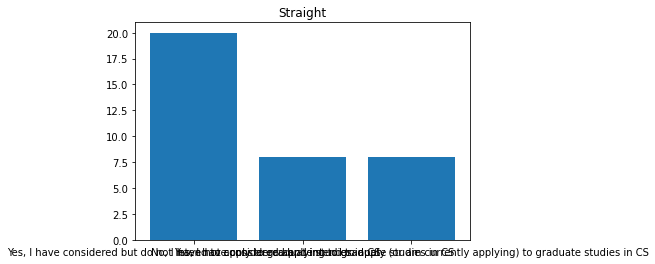

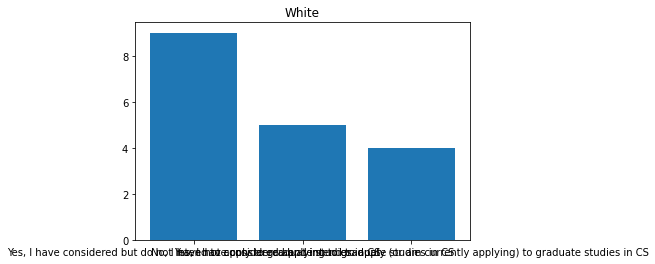

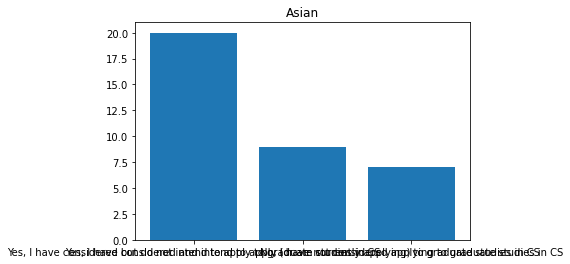

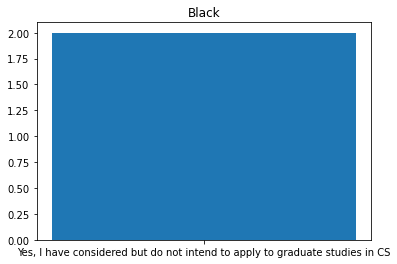

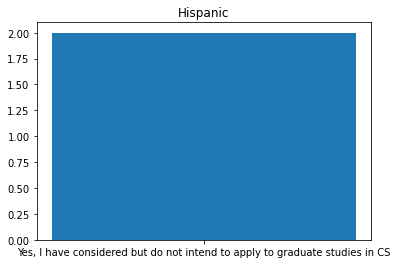

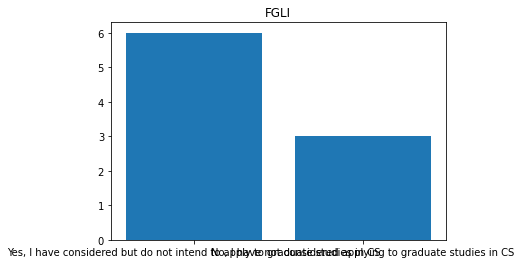

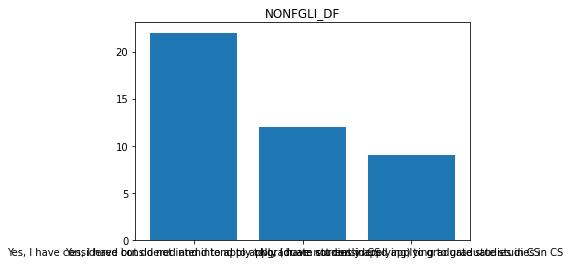

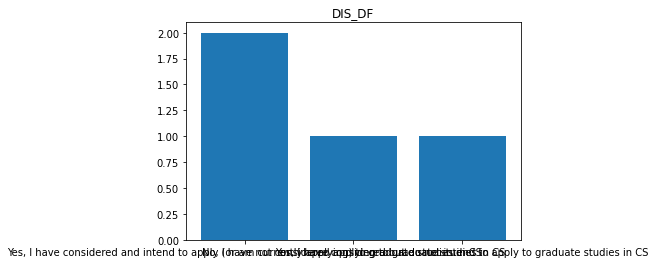

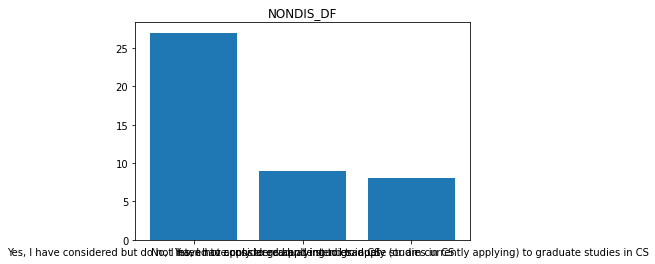

In [17]:
#19- If you answered 'No' to the previous question, which of the following reasons has influenced your decision to not write a senior thesis? Select all that apply.
from matplotlib import pyplot as plt
for df in df_lst:
    dct = get_counts(df_lst[df])
    plt.bar(list(dct.keys()), dct.values())
    plt.title(df)
    plt.show()

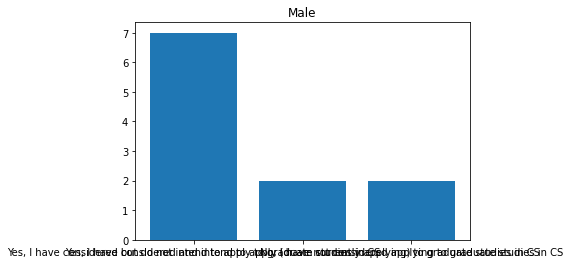

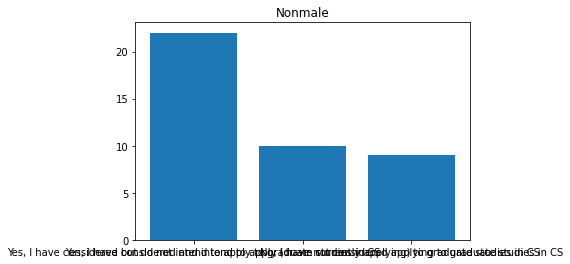

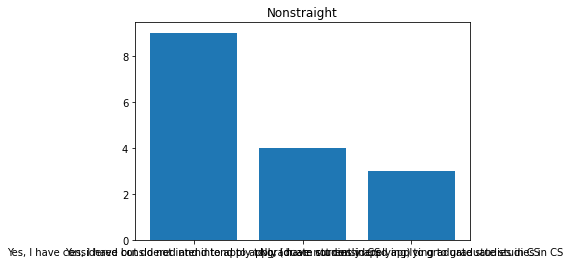

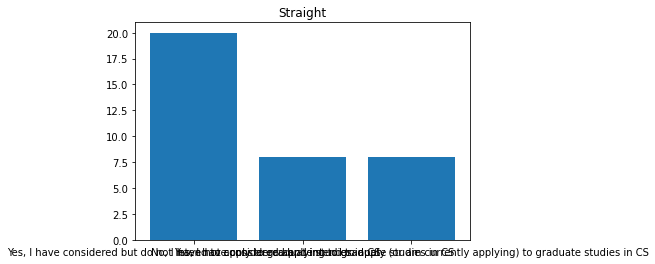

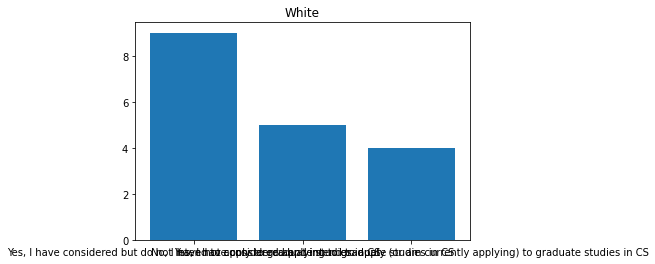

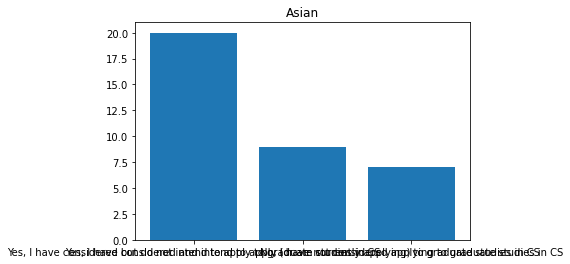

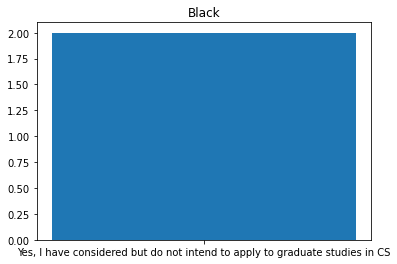

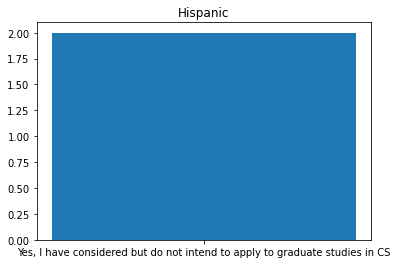

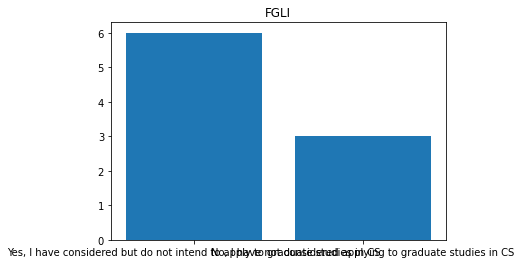

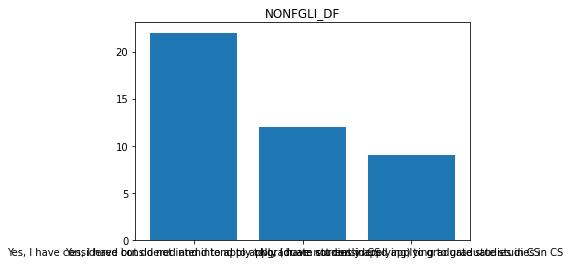

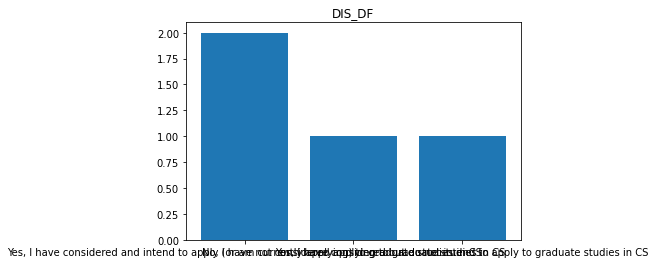

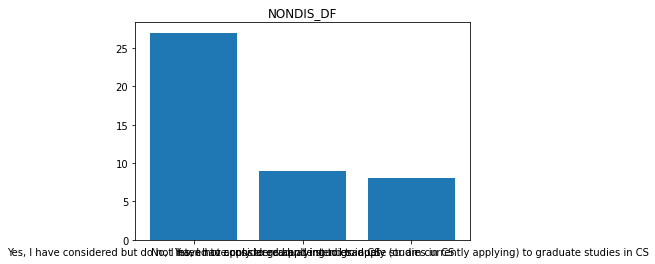

In [18]:
#20- Please indicate the extent to which you disagree or agree with each of the following statements: My primary concentration department is (1-strong disagree, 4- neither agree nor disagree, 7-strongly agree)
from matplotlib import pyplot as plt
for df in df_lst:
    dct = get_counts(df_lst[df])
    plt.bar(list(dct.keys()), dct.values())
    plt.title(df)
    plt.show()
# this is a comment lol\